In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
df = pd.read_csv('hotel_bookings.csv')

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.info()

# To show all th column and understand all the value inside the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# Checking all the missing value that's in the column

df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [6]:
df.describe(include = 'O')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


# Cleaning the data


In [7]:
#Checking the total null value / empty in each column

df.isna().sum()

#there are 4 null value in children
#there are 488 null value in country
#there are 16430 null value in agent
##there are 112593 null value in company
#there are 4 null value in total_guest

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
## Since company and agent has large number of null value we are going to drop both of those columns

df = df.drop(['company', 'agent'], axis = 1)

df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [9]:
# since country has 488 of empty rows and since the data is categorical we're going to fill it with the mode of country
# which is "PRT"

df['country'] = df['country'].fillna(value = "PRT")


In [10]:
df['children'] = df['children'].fillna(value = 0)

In [11]:
#checking all the missing value

df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [12]:
# since all the data is cleared from the missing value now we're going to move on with the next step

In [13]:
df.describe().columns

# we are going to loop all of this columns and make a looping to draw a box plot

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

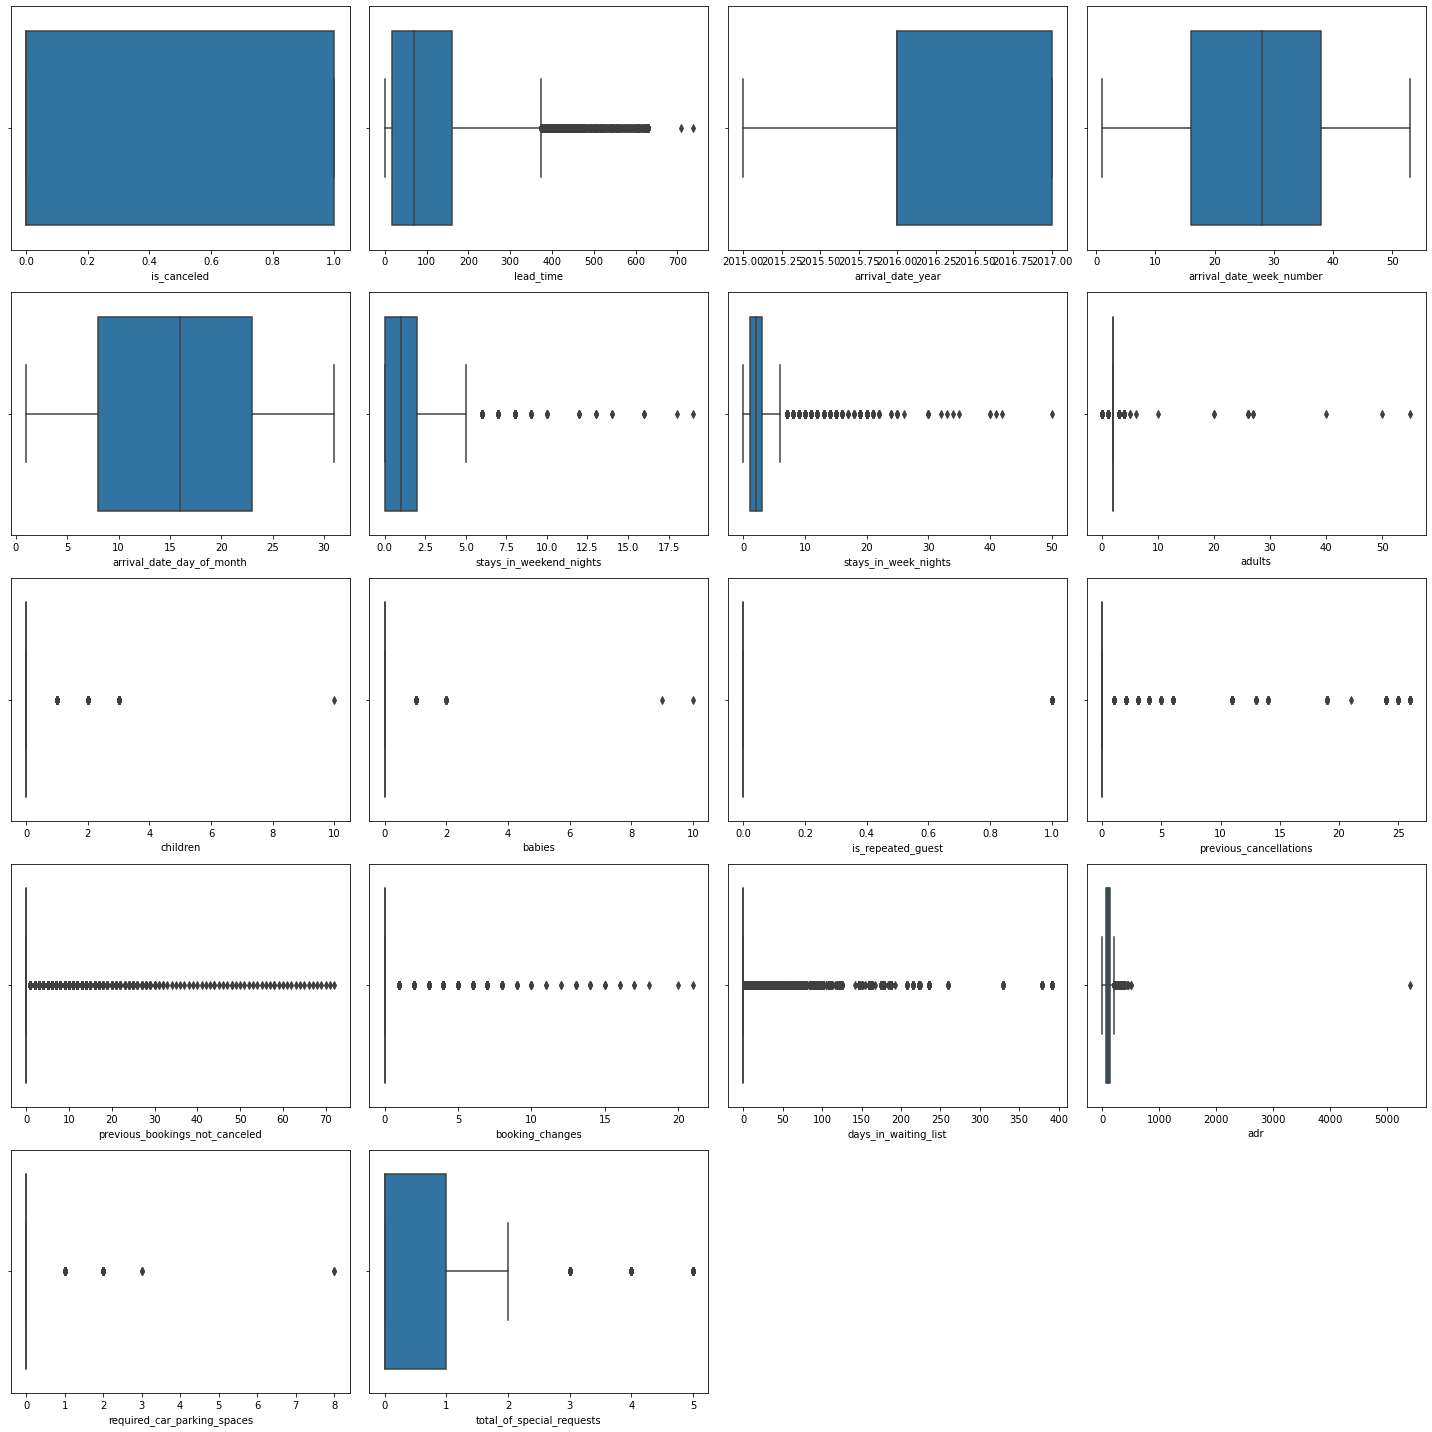

In [14]:
plt.figure(figsize = (20, 20))

x = 1

for column in df.describe().columns:
    plt.subplot(5, 4, x)
    sns.boxplot(df[column])
    x += 1
    plt.tight_layout()

In [15]:
# as we can see there are many outliers in each columns of the df we can see it from the black diamond shaaped in each boxplot
# we are going to keep the outlier since it will be able to tell valueable information in the EDA Process

In [16]:
df.corr().T.sort_values('is_canceled', ascending = False)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
previous_cancellations,0.110133,0.086042,-0.119822,0.035501,-0.027011,-0.012775,-0.013992,-0.006738,-0.024729,-0.007501,0.082293,1.000000,0.152728,-0.026993,0.005929,-0.065646,-0.018492,-0.048384
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
days_in_waiting_list,0.054186,0.170084,-0.056497,0.022933,0.022728,-0.054151,-0.002020,-0.008283,-0.033271,-0.010621,-0.022235,0.005929,-0.009397,-0.011634,1.000000,-0.040756,-0.030600,-0.082730
adr,0.047557,-0.063077,0.197580,0.075791,0.030245,0.049342,0.065237,0.230641,0.324853,0.029186,-0.134314,-0.065646,-0.072144,0.019618,-0.040756,1.000000,0.056628,0.172185
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,-0.033271,0.324853,0.056255,0.081736


# Preparation

In [17]:
### Turning all arrival date column into a single datime arrival column
### Turning reservation status date into column

df['arrival_date'] = df['arrival_date_year'].astype('str') +'-'+df['arrival_date_month'] +'-'+ df['arrival_date_day_of_month'].astype('str')
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [18]:
#adding a booking date column

df['booking_date'] = df['arrival_date'] - pd.to_timedelta(df['lead_time'], unit = 'd')
df.head()

#getting booking date column is by subtracting arrival date with the lead time

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2014-07-24
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2013-06-24
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-24
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-18
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2015-06-17


In [19]:
# Adding total guest column

df['total_guest'] = df['adults'] + df['children'] + df['babies']

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date,total_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2014-07-24,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,2013-06-24,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-24,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,2015-06-18,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2015-06-17,2.0


In [20]:
df = df.drop(df[df.total_guest == 0].index)

#we are dropping this columns because it doesn't make any sense the number of guest is 0 in a confirmed booking

In [21]:
df = df.drop(df[df.adr < 0].index)

# we are dropping this row because adr stands for average daily rate and it doesn't make any sense if the average daily rate is below 0
# there's no way a hotel owe money to the guest

In [202]:
#Adding total stays column

df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_spending'] = df['total_stays'] * df['adr']

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,arrival_date,booking_date,total_guest,total_stays,month_year,arrival_day,arrival_month,total_spending
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,2015-07-01,2014-07-24,2.0,0,2015-07,Wednesday,7,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Check-Out,2015-07-01,2015-07-01,2013-06-24,2.0,0,2015-07,Wednesday,7,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,2015-07-01,2015-06-24,1.0,1,2015-07,Wednesday,7,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Check-Out,2015-07-02,2015-07-01,2015-06-18,1.0,1,2015-07,Wednesday,7,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Check-Out,2015-07-03,2015-07-01,2015-06-17,2.0,2,2015-07,Wednesday,7,196.0


In [23]:
#Adding month year column
df['month_year'] = pd.to_datetime(df['arrival_date']).dt.to_period('M')
df['arrival_day'] = pd.to_datetime(df['arrival_date']).dt.day_name ()
df['arrival_month'] = pd.to_datetime(df['arrival_date']).dt.month
df.head(100)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,booking_date,total_guest,total_stays,month_year,arrival_day,arrival_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,2015-07-01,2014-07-24,2.0,0,2015-07,Wednesday,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,2015-07-01,2013-06-24,2.0,0,2015-07,Wednesday,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,2015-07-01,2015-06-24,1.0,1,2015-07,Wednesday,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,2015-07-01,2015-06-18,1.0,1,2015-07,Wednesday,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,2015-07-01,2015-06-17,2.0,2,2015-07,Wednesday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Resort Hotel,1,72,2015,July,27,3,0,2,2,...,1,Canceled,2015-06-29,2015-07-03,2015-04-22,2.0,2,2015-07,Friday,7
96,Resort Hotel,1,63,2015,July,27,3,2,5,2,...,1,Canceled,2015-05-13,2015-07-03,2015-05-01,2.0,7,2015-07,Friday,7
97,Resort Hotel,0,63,2015,July,27,3,2,5,3,...,1,Check-Out,2015-07-10,2015-07-03,2015-05-01,3.0,7,2015-07,Friday,7
98,Resort Hotel,0,101,2015,July,27,3,2,5,2,...,2,Check-Out,2015-07-10,2015-07-03,2015-03-24,3.0,7,2015-07,Friday,7


In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119209 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119209 non-null  object        
 1   is_canceled                     119209 non-null  int64         
 2   lead_time                       119209 non-null  int64         
 3   arrival_date_year               119209 non-null  int64         
 4   arrival_date_month              119209 non-null  object        
 5   arrival_date_week_number        119209 non-null  int64         
 6   arrival_date_day_of_month       119209 non-null  int64         
 7   stays_in_weekend_nights         119209 non-null  int64         
 8   stays_in_week_nights            119209 non-null  int64         
 9   adults                          119209 non-null  int64         
 10  children                        119209 non-null  float64

In [276]:
df['kids'] = df['children'] + df['babies']

In [24]:
df['meal'] = df['meal'].replace('Undefined', 'SC')
df['meal'].unique()

#The description from the owner of the data set undefined == SC

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [25]:
df['market_segment'] = df['market_segment'].replace('Undefined', 'Online TA')

#undefined is like a missing value so in this case i will fill subtitute it with the mode of market segment column

In [26]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [27]:
df['distribution_channel'] = df['distribution_channel'].replace('distribution_channel', 'TA/TO')

#undefined is like a missing value so in this case i will fill subtitute it with the mode of distribution channel column

In [28]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [29]:
#subsetting into non cancelled df, and cancelled df

df_canceled = df[df['is_canceled'] == 1]
df_not_canceled = df[df['is_canceled'] == 0]

In [30]:
df.shape

(119209, 37)

# EDA Process

## Univariate Analysis

### Hotel Types

In [31]:
#We will start by looking at the number of different types of hotel in the dataframe
print('Types of hotel')

print("")
print(df['hotel'].value_counts())
print('-' * 50)
print(round(df['hotel'].value_counts(normalize = True),2))


#This dataset consist of 66% city hotel bookings and 34% of resort hotel bookings

# * Assumption city hotel tend to be cheaper than a resort hotel that's why "maybe" there are more booking to the city hotel
# compared to the resort hotel we will dive more into it later on

Types of hotel

City Hotel      79163
Resort Hotel    40046
Name: hotel, dtype: int64
--------------------------------------------------
City Hotel      0.66
Resort Hotel    0.34
Name: hotel, dtype: float64


### Cancellation

In [32]:
print("Total number of cancelation :")
print("")
print(df['is_canceled'].value_counts())
print("")

print("-" * 50)
print("")
print('Percentage of cancelation :')
print("")
print(round(df['is_canceled'].value_counts(normalize = True),2))

#as we can see from this dataframe that 37% of booking canceled 
# note : 1 means the booking is canceled while 0 means the booking is not canceled

Total number of cancelation :

0    75010
1    44199
Name: is_canceled, dtype: int64

--------------------------------------------------

Percentage of cancelation :

0    0.63
1    0.37
Name: is_canceled, dtype: float64


### Country


In [33]:
print(df['country'].value_counts(normalize = True).head(10))

print("")
print("-" * 50)

print("")
print("")

print(f"10 countries with the most booking contributed to {round(df['country'].value_counts(normalize = True).head(10).sum(),2) * 100} percent of the booking")

# Portugal and Greatbritain are the only countries that has more than 10 % of total booking from this dataset

PRT    0.410716
GBR    0.101662
FRA    0.087250
ESP    0.071807
DEU    0.061111
ITA    0.031550
IRL    0.028303
BEL    0.019646
BRA    0.018640
NLD    0.017641
Name: country, dtype: float64

--------------------------------------------------


10 countries with the most booking contributed to 85.0 percent of the booking


### Countries with the highest cancelation

In [34]:
print('Top 10 countries with the highest cancellation :')
print("")
print(df_canceled['country'].value_counts(normalize = True).head(10))
print("")

print(f"10 countries with the highest cancelation of booking contributed to {round(df_canceled['country'].value_counts(normalize = True).head(10).sum() * 100)} percent of cancellation")

#Portugal has the highest amount of total booking and a whooping 62 %  booking cancelation of the data

Top 10 countries with the highest cancellation :

PRT    0.623611
GBR    0.055476
ESP    0.049255
FRA    0.043734
ITA    0.030159
DEU    0.027557
IRL    0.018824
BRA    0.018779
USA    0.011335
BEL    0.010724
Name: country, dtype: float64

10 countries with the highest cancelation of booking contributed to 89.0 percent of cancellation


### Countries with highest Not Canceled Booking


In [35]:
print('top 10 countries with not cancelled booking:')
print("")
print(df_not_canceled['country'].value_counts(normalize = True).head(10))
print("")
print('-' * 50)
print(f"10 countries with the highest confirmed arrival contributed to {df_not_canceled['country'].value_counts(normalize = True).head(10).sum().round(2) * 100} percent of total confirmed arrival")


top 10 countries with not cancelled booking:

PRT    0.285269
GBR    0.128876
FRA    0.112892
ESP    0.085095
DEU    0.080883
IRL    0.033889
ITA    0.032369
BEL    0.024903
NLD    0.022877
USA    0.021224
Name: country, dtype: float64

--------------------------------------------------
10 countries with the highest confirmed arrival contributed to 83.0 percent of total confirmed arrival


### Arrival month year (Including canceled Booking)



In [36]:
print('Number of Planned Arrival Month and Year :')
print("")

print(df['month_year'].value_counts())

print("")
print("-" * 50)
print('percentage of planned arrival month and year : ')
print("")

print(df['month_year'].value_counts(normalize = True))


# percentage of the arrival month and year of the total booking including canceled booking 
# may 2017 seems most traveler plan to arrive at the hotel 
# and january 2016 seems to be the least amount of people will arrive at the hotel

Number of Planned Arrival Month and Year :

2017-05    6305
2016-10    6196
2017-04    5653
2017-06    5639
2016-05    5475
2016-04    5425
2016-09    5391
2017-07    5310
2016-06    5290
2015-09    5109
2016-08    5055
2015-10    4951
2017-03    4948
2017-08    4923
2016-03    4819
2016-07    4560
2016-11    4434
2017-02    4168
2016-02    3884
2015-08    3883
2016-12    3846
2017-01    3673
2015-12    2913
2015-07    2774
2015-11    2337
2016-01    2248
Freq: M, Name: month_year, dtype: int64

--------------------------------------------------
percentage of planned arrival month and year : 

2017-05    0.052890
2016-10    0.051976
2017-04    0.047421
2017-06    0.047303
2016-05    0.045928
2016-04    0.045508
2016-09    0.045223
2017-07    0.044544
2016-06    0.044376
2015-09    0.042858
2016-08    0.042405
2015-10    0.041532
2017-03    0.041507
2017-08    0.041297
2016-03    0.040425
2016-07    0.038252
2016-11    0.037195
2017-02    0.034964
2016-02    0.032581
2015-08    0.032573

### Arrival month not canceled

In [37]:
print('number of confirmed arrival per month year : ')
print("")
print(df_not_canceled['month_year'].value_counts())
print("")
print("-" * 50)
print("")
print('Percentage of confirmed arrival year: ')
print(df_not_canceled['month_year'].value_counts(normalize = True))

# this data tells data the busiest month and year for the hotels happened on october 2016 and the least busy month and year
# happened on july 2015 followed by january 2016

number of confirmed arrival per month year : 

2016-10    3682
2016-05    3560
2017-05    3543
2016-09    3369
2016-04    3365
2016-03    3342
2017-07    3326
2017-03    3277
2016-08    3230
2015-10    3219
2017-06    3201
2017-04    3195
2016-06    3194
2017-08    3109
2016-07    3066
2015-09    3016
2017-02    2810
2016-11    2800
2016-02    2549
2016-12    2451
2017-01    2424
2015-08    2285
2015-12    1940
2015-11    1851
2016-01    1691
2015-07    1515
Freq: M, Name: month_year, dtype: int64

--------------------------------------------------

Percentage of confirmed arrival year: 
2016-10    0.049087
2016-05    0.047460
2017-05    0.047234
2016-09    0.044914
2016-04    0.044861
2016-03    0.044554
2017-07    0.044341
2017-03    0.043688
2016-08    0.043061
2015-10    0.042914
2017-06    0.042674
2017-04    0.042594
2016-06    0.042581
2017-08    0.041448
2016-07    0.040875
2015-09    0.040208
2017-02    0.037462
2016-11    0.037328
2016-02    0.033982
2016-12    0.032676
2017-

### Arrival month canceled booking

In [38]:
print('Number of canceled booking based on arrival month and year :')
print("")


print(df_canceled['month_year'].value_counts())
print("")
print("-" * 50)
print("percentage of canceled booking based on arrival year: ")
print("")
print(df_canceled['month_year'].value_counts(normalize = True))

# of all total booking that's canceled seems like traveler who planned to arrive on may 2017 has the highest rate of cancelation
# compared to other month and year

# while november 2015 has the least amount of cancelation

Number of canceled booking based on arrival month and year :

2017-05    2762
2016-10    2514
2017-04    2458
2017-06    2438
2016-06    2096
2015-09    2093
2016-04    2060
2016-09    2022
2017-07    1984
2016-05    1915
2016-08    1825
2017-08    1814
2015-10    1732
2017-03    1671
2016-11    1634
2015-08    1598
2016-07    1494
2016-03    1477
2016-12    1395
2017-02    1358
2016-02    1335
2015-07    1259
2017-01    1249
2015-12     973
2016-01     557
2015-11     486
Freq: M, Name: month_year, dtype: int64

--------------------------------------------------
percentage of canceled booking based on arrival year: 

2017-05    0.062490
2016-10    0.056879
2017-04    0.055612
2017-06    0.055160
2016-06    0.047422
2015-09    0.047354
2016-04    0.046607
2016-09    0.045748
2017-07    0.044888
2016-05    0.043327
2016-08    0.041291
2017-08    0.041042
2015-10    0.039186
2017-03    0.037806
2016-11    0.036969
2015-08    0.036155
2016-07    0.033802
2016-03    0.033417
2016-12    0.0

## Meal

In [39]:
df['meal'].value_counts()

# BB = Bed & Breakfast 
# HB = Breakfast and other meal
# SC = No meal
# FB = Full board breakfast lunch dinner

# from the total booking Bed and breakfast seems to be the most popular meal bundling package


BB    92235
HB    14458
SC    11718
FB      798
Name: meal, dtype: int64

In [40]:

df_canceled['meal'].value_counts()

#Traveler who booked BB meal tend to have the highest cancelaation number

BB    34506
HB     4983
SC     4232
FB      478
Name: meal, dtype: int64

In [41]:
df_not_canceled['meal'].value_counts()

#Traveler who booked BB meal seems to have the highest confirmed arrival aswell

BB    57729
HB     9475
SC     7486
FB      320
Name: meal, dtype: int64

In [42]:
df['market_segment'].value_counts()

Online TA        56410
Offline TA/TO    24182
Groups           19790
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Name: market_segment, dtype: int64

In [43]:
print(df_canceled['market_segment'].value_counts())
print("")

print(df_canceled['market_segment'].value_counts(normalize = True))

Online TA        20737
Groups           12094
Offline TA/TO     8302
Direct            1934
Corporate          991
Complementary       89
Aviation            52
Name: market_segment, dtype: int64

Online TA        0.469174
Groups           0.273626
Offline TA/TO    0.187832
Direct           0.043757
Corporate        0.022421
Complementary    0.002014
Aviation         0.001176
Name: market_segment, dtype: float64


In [44]:
#market segment for confirmed arrival

df_not_canceled['market_segment'].value_counts()

#

Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7696
Corporate         4291
Complementary      639
Aviation           183
Name: market_segment, dtype: int64

### Room type

In [45]:
df['reserved_room_type'].value_counts(normalize = True)

A    0.720348
D    0.160886
E    0.054685
F    0.024277
G    0.017549
B    0.009353
C    0.007810
H    0.005042
L    0.000050
Name: reserved_room_type, dtype: float64

In [46]:
df_canceled['reserved_room_type'].value_counts(normalize = True)

A    0.760764
D    0.138035
E    0.043168
F    0.019910
G    0.017263
B    0.008303
C    0.006968
H    0.005543
L    0.000045
Name: reserved_room_type, dtype: float64

In [47]:
df_not_canceled['reserved_room_type'].value_counts(normalize = True)

A    0.696534
D    0.174350
E    0.061472
F    0.026850
G    0.017718
B    0.009972
C    0.008306
H    0.004746
L    0.000053
Name: reserved_room_type, dtype: float64

### Deposit 

In [48]:
df['deposit_type'].value_counts(normalize = True)

No Deposit    0.876276
Non Refund    0.122365
Refundable    0.001359
Name: deposit_type, dtype: float64

In [49]:
df_canceled['deposit_type'].value_counts(normalize = True)

No Deposit    0.671260
Non Refund    0.327926
Refundable    0.000814
Name: deposit_type, dtype: float64

In [50]:
df_not_canceled['deposit_type'].value_counts(normalize = True)

No Deposit    0.99708
Refundable    0.00168
Non Refund    0.00124
Name: deposit_type, dtype: float64

### Customer type

In [51]:
df['customer_type'].value_counts(normalize = True)

Transient          0.750581
Transient-Party    0.210446
Contract           0.034158
Group              0.004815
Name: customer_type, dtype: float64

In [52]:
df_not_canceled['customer_type'].value_counts(normalize = True)

Transient          0.706332
Transient-Party    0.249327
Contract           0.037462
Group              0.006879
Name: customer_type, dtype: float64

In [53]:
df_canceled['customer_type'].value_counts(normalize = True)

Transient          0.825675
Transient-Party    0.144460
Contract           0.028553
Group              0.001312
Name: customer_type, dtype: float64

# Bivariate and multivariate analaysis

## Cancelation rate and types of hotel

In [54]:
#let see which types of hotel has a higher cancelation percentage of cancelation

round(df.groupby('hotel').sum() / len(df.index), 2)['is_canceled']

#this tells that city hotel has a higher rate of cancelation compared to resort hotel

hotel
City Hotel      0.28
Resort Hotel    0.09
Name: is_canceled, dtype: float64

In [348]:
pd.crosstab(index = df['is_canceled'], columns = df['arrival_date_year'], normalize = True).round(2)

arrival_date_year,2015,2016,2017
is_canceled,,,
0,0.12,0.30,0.21
1,0.07,0.17,0.13


### Cancelation rate based on hotel type and month year

In [56]:
pd.crosstab(index = df['month_year'], columns = [df['is_canceled'],df['hotel']], normalize = 'index').round(2)
# july of 2015 seems to be to worst performing month for city hotel with highest cancellation rate with 34 % in a single month
#  for resort hotel highest cancelation rate happened on August 2017 with a cancellation rate of 14 % in a single month

# higest number of confirmed arrival (not_cancelled booking) for city hotel is on July 2017 with 46 % of confirmed arrival from total booking of both hotel
# higest number of confirmed arrival (not_cancelled booking) for resort hotel is on November 2015 with 39 % of confirmed arrival from total booking of both hotel

#for majority of the month year city hotel have a higher confirmed arrival compared to resort hotel, with an exeption of july 2015 resort hotel has higher confirmed arrival

is_canceled          0                       1             
hotel       City Hotel Resort Hotel City Hotel Resort Hotel
month_year                                                 
2015-07           0.16         0.38       0.34         0.12
2015-08           0.32         0.27       0.32         0.09
2015-09           0.39         0.20       0.30         0.11
2015-10           0.42         0.23       0.27         0.08
2015-11           0.40         0.39       0.13         0.08
2015-12           0.34         0.33       0.23         0.10
2016-01           0.41         0.34       0.19         0.05
2016-02           0.37         0.29       0.24         0.10
2016-03           0.40         0.29       0.23         0.08
2016-04           0.37         0.25       0.28         0.10
2016-05           0.41         0.24       0.26         0.09
2016-06           0.42         0.19       0.33         0.07
2016-07           0.46         0.22       0.23         0.10
2016-08           0.42         0.22       0.25         0.11
2016-09           0.43         0.20       0.29         0.08
2016-10           0.37         0.23       0.31         0.09
2016-11           0.39         0.24       0.31         0.06
2016-12           0.36         0.27       0.28         0.08
2017-01           0.36         0.30       0.28         0.06
2017-02           0.39         0.29       0.23         0.09
2017-03           0.43         0.23       0.26         0.08
2017-04           0.35         0.21       0.34         0.09
2017-05           0.37         0.19       0.35         0.09
2017-06           0.38         0.19       0.32         0.11
2017-07           0.42         0.21       0.25         0.12
2017-08           0.41         0.22       0.23         0.14

### Cancelation rate based on total stays and hotel types

In [57]:
pd.crosstab(index = df['total_stays'], columns = [df['hotel'], df['is_canceled']],normalize = 'columns')

# For City hotel traveler who book for 2 days has the highest chances to cancel a booking compared to other group in city hotels 
# For Resort hotel traveler who book for 7 days has the highest cancelation rate compared to other group

hotel       City Hotel           Resort Hotel          
is_canceled          0         1            0         1
total_stays                                            
0             0.005447  0.000393     0.012826  0.000899
1             0.198659  0.124036     0.227442  0.105036
2             0.238326  0.315366     0.155155  0.155486
3             0.257985  0.286647     0.132338  0.167716
4             0.166956  0.146709     0.114810  0.135342
5             0.069655  0.053659     0.065650  0.079766
6             0.024108  0.028356     0.041658  0.053237
7             0.027016  0.024426     0.153288  0.194335
8             0.004448  0.005321     0.017597  0.023831
9             0.002582  0.002811     0.014105  0.019784
10            0.001736  0.003507     0.024131  0.021583
11            0.000716  0.001391     0.008297  0.006655
12            0.000716  0.000907     0.003077  0.006115
13            0.000325  0.000786     0.002593  0.002248
14            0.000564  0.002146     0.021780  0.016727
15            0.000304  0.000756     0.000795  0.000899
16            0.000130  0.000302     0.000415  0.001079
17            0.000087  0.000121     0.000380  0.000090
18            0.000022  0.000181     0.000173  0.002068
19            0.000043  0.000302     0.000138  0.000540
20            0.000022  0.000363     0.000000  0.000090
21            0.000022  0.000272     0.001210  0.002338
22            0.000043  0.000121     0.000242  0.000000
23            0.000022  0.000030     0.000035  0.000450
24            0.000022  0.000151     0.000000  0.000000
25            0.000000  0.000060     0.000484  0.001888
26            0.000000  0.000091     0.000000  0.000270
27            0.000000  0.000091     0.000000  0.000090
28            0.000000  0.000091     0.000761  0.000809
29            0.000000  0.000302     0.000069  0.000090
30            0.000000  0.000242     0.000069  0.000270
33            0.000000  0.000060     0.000000  0.000090
34            0.000022  0.000000     0.000000  0.000000
35            0.000000  0.000000     0.000173  0.000000
38            0.000000  0.000000     0.000035  0.000000
42            0.000000  0.000000     0.000104  0.000090
45            0.000000  0.000000     0.000035  0.000000
46            0.000000  0.000000     0.000035  0.000000
48            0.000022  0.000000     0.000000  0.000000
56            0.000000  0.000000     0.000035  0.000090
60            0.000000  0.000000     0.000035  0.000000
69            0.000000  0.000000     0.000035  0.000000

## Cancellation Based On  Meal package and hotel types

In [58]:
pd.crosstab(index = df['meal'], columns = [df['is_canceled'], df['hotel']], normalize = 'columns')

# conclusion from this table most traveler who come to city or resort hotel mostly prefer bed and breakfast meal package
# bed and breakfast has the highest cancellation rate for both hotel
# for city hotel no meal package (SC) has the second highest cancellation rate after BB
# for resort hotel Half board (HB) package  has the second highest cancellation rate

# for city hotel lowest cancellation rate is FB meal package
# for the resort hotel lowest cancellation rate is no meal package(SC)


is_canceled          0                       1             
hotel       City Hotel Resort Hotel City Hotel Resort Hotel
meal                                                       
BB            0.771851     0.766058   0.806040     0.705306
FB            0.000195     0.010752   0.001058     0.039838
HB            0.086277     0.190106   0.073642     0.229047
SC            0.141676     0.033084   0.119260     0.025809

### Cancellation based on day and hotel type

In [59]:
pd.crosstab(index = df['arrival_day'], columns = [df['hotel'], df['is_canceled']], normalize = 'columns').round(2)

# For Resort hotel booking with arrival day of saturday seem to have the highest cancellation rate
# while for city hotel booking with with arrival day of thursday and friday have the highest cancellation rate



hotel       City Hotel       Resort Hotel      
is_canceled          0     1            0     1
arrival_day                                    
Friday            0.17  0.19         0.13  0.16
Monday            0.16  0.14         0.16  0.15
Saturday          0.13  0.15         0.16  0.21
Sunday            0.13  0.10         0.12  0.13
Thursday          0.14  0.19         0.16  0.15
Tuesday           0.12  0.10         0.13  0.10
Wednesday         0.14  0.14         0.13  0.11

In [60]:
# pd.crosstab(index = df['is_canceled'], columns = [df['hotel'], df['country']], normalize = True).sort_values('country', axis = 1, ascending = False)

# Find out more about correlation of canceled and country and hotel types

# pd.crosstab(index = df['country'], columns = df['is_canceled'], normalize = 'columns').sort_values('is_canceled', axis = 1, ascending = False)

### Cancellation and lead time

In [61]:
(df.groupby('lead_time')['is_canceled'].sum().sort_values(ascending = False).head(20)) / len(df_canceled.index)

# 1% of total cancellation come from traveler who booked the hotel on the same day as the arrival
# other than 0 and 1 day lead time cancellation seems to be on the higher side if lead time is more than 2



lead_time
0      0.009435
56     0.008009
28     0.007670
34     0.007466
37     0.007217
1      0.007195
38     0.006312
12     0.006290
68     0.005950
19     0.005905
18     0.005905
87     0.005747
277    0.005724
44     0.005724
15     0.005701
92     0.005611
27     0.005543
30     0.005498
105    0.005362
74     0.005339
Name: is_canceled, dtype: float64

In [62]:
### Cancellation and deposit type

In [63]:
pd.crosstab(columns = df['is_canceled'], index = df['deposit_type'], normalize = 'columns').round(3)

# most of the booking (confirmed or canceled) has no deposit
# non refundable has the lowest number confirmed booking (not cancelled) with only 0.1 % of confirmed arrival
# however 33 % of canceled booking comes from traveler who booked with non refund policy
# Refundable deposit type has the lowest percentage of cancellation compared to other deposit type


is_canceled,0,1
deposit_type,,
No Deposit,0.997,0.671
Non Refund,0.001,0.328
Refundable,0.002,0.001


### Comparison between deposit_type, hotel and cancellation

In [64]:
print(pd.crosstab(columns = [df['hotel'],df['is_canceled']], index = df['deposit_type']))
print("")

print("-" * 50)

print("")
print(pd.crosstab(columns = [df['hotel'],df['is_canceled']], index = df['deposit_type'],normalize = 'columns').round(4))

#General Analysis :
    # Both hotel has the highest confirmed booking and cancelled booking from no deposit policy
    # Of all deposit type policy, non refund seems to have the highest cancellation rate compared to it's confirmed arrival
    # very low percentage of confirmed booking and canceled booking in refundable deposit policy

# Suggestion :
    # Both Hotel should try to push more on the refundable deposit policy since in both hotel it has the lowest of cancellation rate
    # cheaper rate for refundable program

hotel        City Hotel        Resort Hotel      
is_canceled           0      1            0     1
deposit_type                                     
No Deposit        46054  20221        28737  9448
Non Refund           24  12844           69  1650
Refundable            6     14          120    22

--------------------------------------------------

hotel        City Hotel         Resort Hotel        
is_canceled           0       1            0       1
deposit_type                                        
No Deposit       0.9993  0.6113       0.9935  0.8496
Non Refund       0.0005  0.3883       0.0024  0.1484
Refundable       0.0001  0.0004       0.0041  0.0020


### Cancellation Market segment

In [71]:
print(pd.crosstab(index = df['market_segment'], columns = df['is_canceled']))

print("")

print('-' * 50)

print("")

print(pd.crosstab(index = df['market_segment'], columns = df['is_canceled'], normalize = 'index'))

# Analysis :
    # Of all distribution channel  group booking is the only market segment that has a higher cancellation rate compared to it's  confirmed booking
    # Complementary has the lowest of cancellation rate compared to other market segment
    # next to complementary direct booking seems to be the 2nd lowest cancellation rate among all market segment
    



is_canceled         0      1
market_segment              
Aviation          183     52
Complementary     639     89
Corporate        4291    991
Direct          10648   1934
Groups           7696  12094
Offline TA/TO   15880   8302
Online TA       35673  20737

--------------------------------------------------

is_canceled            0         1
market_segment                    
Aviation        0.778723  0.221277
Complementary   0.877747  0.122253
Corporate       0.812382  0.187618
Direct          0.846288  0.153712
Groups          0.388883  0.611117
Offline TA/TO   0.656687  0.343313
Online TA       0.632388  0.367612


In [84]:
print(pd.crosstab(index = df['market_segment'], columns = [df['deposit_type'],df['is_canceled']], margins = True))
print("")
print('-' * 90)
print(pd.crosstab(index = df['market_segment'], columns = [df['deposit_type'],df['is_canceled']], normalize = 'index'))

# Analysis :
    # Among all market segmentation, group with non refund policy has the highest rate of cancellation

deposit_type   No Deposit        Non Refund        Refundable         All
is_canceled             0      1          0      1          0   1        
market_segment                                                           
Aviation              183     52          0      0          0   0     235
Complementary         639     89          0      0          0   0     728
Corporate            4266    678         22    312          3   1    5282
Direct              10641   1916          3     16          4   2   12582
Groups               7517   2971         62   9110        117  13   19790
Offline TA/TO       15875   3297          3   5003          2   2   24182
Online TA           35670  20666          3     53          0  18   56410
All                 74791  29669         93  14494        126  36  119209

------------------------------------------------------------------------------------------
deposit_type   No Deposit           Non Refund           Refundable          
is_canceled     

### Market Segment, Deposit types, Adr

In [210]:
pd.crosstab(index = df['market_segment'], columns = [ df['deposit_type'],df['is_canceled']], values = df['adr'], aggfunc = 'median')

# For No deposit booking corporate booking have the lowest median adr for confirmed traveler
# for canceled  no deposit booking group booking has the lowest adr

# group booking has the lowest adr median for non refund canceled or confirmed booking
# group booking also has the lowest median adr for refundable canceled or confirmed booking

deposit_type   No Deposit         Non Refund        Refundable        
is_canceled             0       1          0      1          0       1
market_segment                                                        
Aviation            95.00  106.75        NaN    NaN        NaN     NaN
Complementary        0.00    0.00        NaN    NaN        NaN     NaN
Corporate           65.00   72.00     106.00   90.0       85.5   79.00
Direct             104.00  114.00      89.00  100.0       70.0  127.50
Groups              72.00   63.40      54.50   75.0       66.0   46.00
Offline TA/TO       80.75   85.00      72.25   95.0       74.0   78.23
Online TA          107.10  116.10     173.95   85.5        NaN  139.50

### Market Segment, Deposit types, Total Spending

In [211]:
pd.crosstab(index = df['market_segment'], columns = [ df['deposit_type'],df['is_canceled']], values = df['total_spending'], aggfunc = 'median')

# For non cancelled booking Online Travel agent has the highest median total spending for No deposit and No Refund Policy
# Corporate has the lowest total spending for no deposit policy (complementary excluded)
# Non cancelled Direct Booking has the lowest median total spending for refundable, and no refund policy 
#


deposit_type   No Deposit         Non Refund        Refundable         
is_canceled             0       1          0      1          0        1
market_segment                                                         
Aviation            285.0  190.00        NaN    NaN        NaN      NaN
Complementary         0.0    0.00        NaN    NaN        NaN      NaN
Corporate            88.0  100.00     318.00  200.0       85.5  474.000
Direct              237.6  340.00      89.00  300.0       70.0  659.250
Groups              196.0  188.40     109.00  180.0      240.0  184.000
Offline TA/TO       260.0  251.20     361.25  255.0      179.5  714.070
Online TA           315.9  381.45     335.32  167.0        NaN  473.005

### Arrival month, hotel type, is canceled and adr

In [203]:
pd.crosstab(index = df['arrival_month'], columns = [df['hotel'], df['is_canceled']], values = df['adr'], aggfunc = 'median')

hotel         City Hotel         Resort Hotel        
is_canceled            0       1            0       1
arrival_month                                        
1                  80.00   80.00       45.000   51.50
2                  81.00   77.35       49.995   54.00
3                  88.00   89.32       55.000   58.60
4                 105.30  104.00       74.090   80.00
5                 117.84  120.60       72.000   78.56
6                 115.00  120.00      100.290  110.00
7                 112.00   96.00      145.670  163.00
8                 112.67  101.50      179.600  199.00
9                 109.00  101.50       87.765   81.00
10                100.00   98.10       57.970   58.00
11                 79.20   89.00       46.200   40.00
12                 81.88   88.00       55.000   66.00

### Spending on month to month basis

In [205]:
pd.crosstab(index = df['arrival_month'], columns = [df['hotel'], df['is_canceled']], values = df['total_spending'], aggfunc = 'median')

# From the month of may to september resort hotel has a higher median spending compared to city hotel
# August seem to be the highest median spending for both hotel

hotel         City Hotel        Resort Hotel        
is_canceled            0      1            0       1
arrival_month                                       
1                 195.00  176.0       86.000  144.00
2                 225.00  190.0      116.000  144.00
3                 244.50  261.9      153.000  224.07
4                 320.00  300.0      236.275  330.00
5                 323.00  300.0      258.000  324.00
6                 283.70  315.0      468.000  516.00
7                 280.00  270.0      671.020  840.00
8                 306.00  258.0      828.800  955.00
9                 250.20  240.0      404.440  317.00
10                257.01  226.8      184.000  243.00
11                216.75  267.0      120.000  129.60
12                232.00  260.0      132.000  204.00

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119209 entries, 0 to 119389
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119209 non-null  object        
 1   is_canceled                     119209 non-null  int64         
 2   lead_time                       119209 non-null  int64         
 3   arrival_date_year               119209 non-null  int64         
 4   arrival_date_month              119209 non-null  object        
 5   arrival_date_week_number        119209 non-null  int64         
 6   arrival_date_day_of_month       119209 non-null  int64         
 7   stays_in_weekend_nights         119209 non-null  int64         
 8   stays_in_week_nights            119209 non-null  int64         
 9   adults                          119209 non-null  int64         
 10  children                        119209 non-null  float64

# Visualization

## Arrival


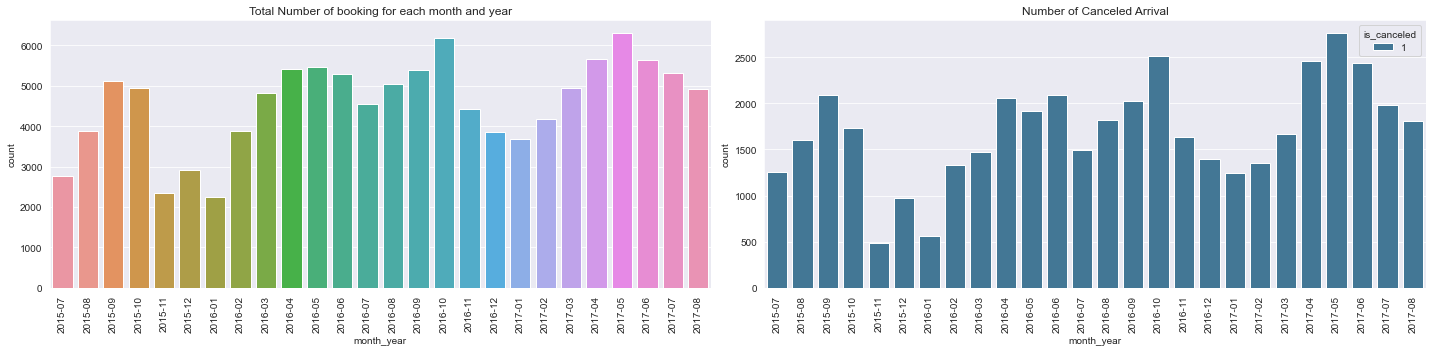

In [336]:

plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
schart = sns.countplot(x = 'month_year', data = df)
schart.set_xticklabels(
    schart.get_xticklabels(), 
    rotation=90)
plt.title('Total Number of booking for each month and year')
plt.subplot(1,2,2)
schart1 = sns.countplot(x = 'month_year', data = df_canceled, hue = 'is_canceled', palette = 'mako')
schart1.set_xticklabels(
    schart1.get_xticklabels(), 
    rotation=90)
plt.title('Number of Canceled Arrival')
plt.tight_layout()




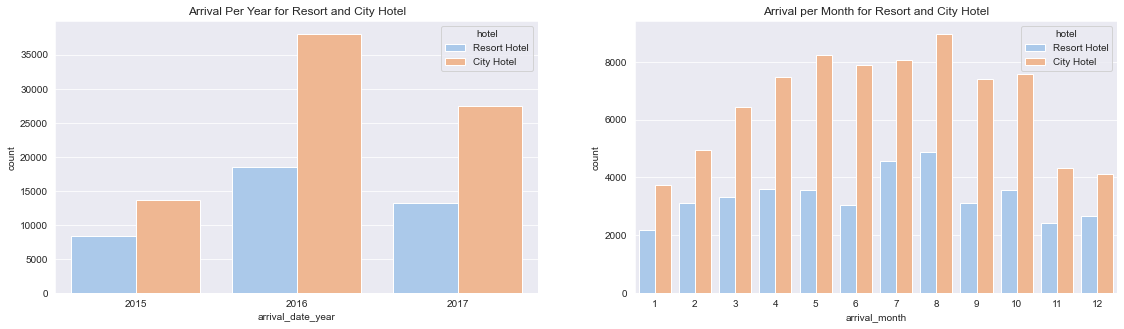

In [262]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.countplot(x = 'arrival_date_year', hue = 'hotel', data = df, palette = 'pastel')
plt.title("Arrival Per Year for Resort and City Hotel")
plt.subplot(1,2,2)
sns.countplot(x = 'arrival_month', hue = 'hotel', data = df, palette = 'pastel')
plt.title("Arrival per Month for Resort and City Hotel")
plt.subplots_adjust(right = 1.6)

plt.show()


# Both hotel has their highest booking in 2016 
# City Hotel has more booking compared to resort hotel
# for month to month analysis, August seems to be the busiest month for both hotels, and january seems to be least busy month for both hotels

### Arrival Month, Total Stays, Total Guest

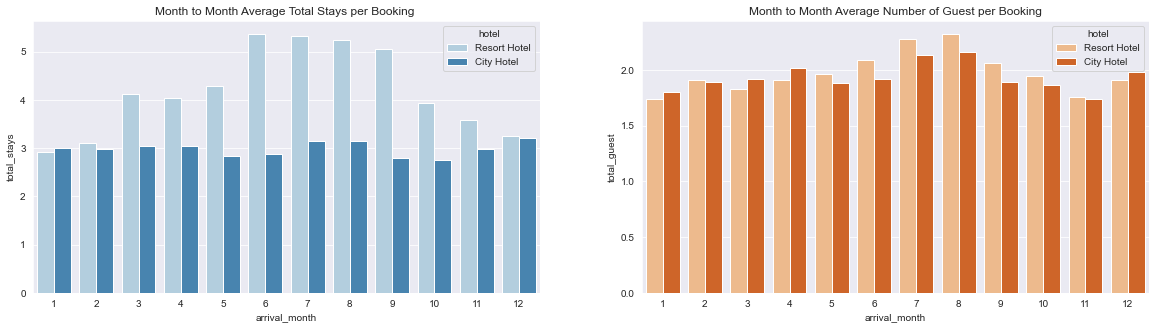

In [284]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.barplot(x = 'arrival_month', y= 'total_stays',hue = 'hotel', palette = 'Blues', data = df, ci = 0)
plt.title('Month to Month Average Total Stays per Booking ')
plt.subplot(1,2,2)
sns.barplot(x = 'arrival_month', y= 'total_guest',hue = 'hotel', palette = 'Oranges', data = df, ci = 0)
plt.title('Month to Month Average Number of Guest per Booking')
plt.show()

# For month to month analysis traveler who booked resort hotel tend to stay longer compared to traveler who booked city hotel
# For Majority of the year both hotel has almost similar number of guest of each booking 
# For City Hotel traveler stays for 3 days in average for the majority of the year

### Number of Kids

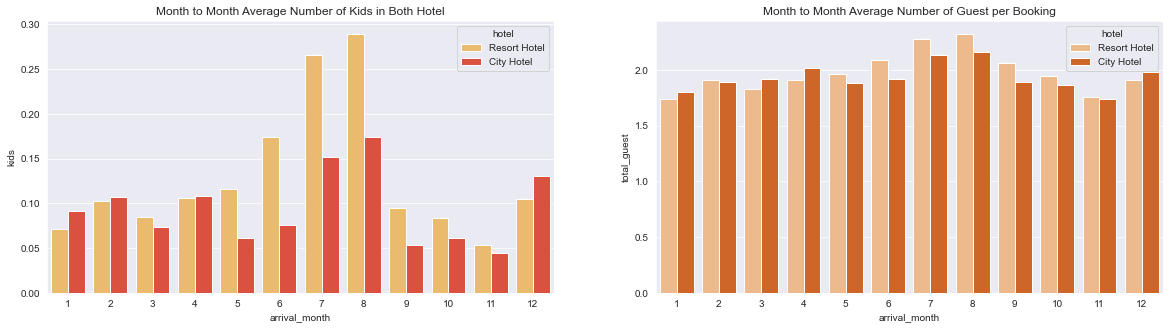

In [285]:
plt.figure(figsize = (20, 5))

plt.subplot(1,2,1)
sns.barplot(x = 'arrival_month', y= 'kids',hue = 'hotel', palette = 'YlOrRd', data = df, ci = 0)
plt.title('Month to Month Average Number of Kids in Both Hotel')
plt.subplot(1,2,2)
sns.barplot(x = 'arrival_month', y= 'total_guest',hue = 'hotel', palette = 'Oranges', data = df, ci = 0)
plt.title('Month to Month Average Number of Guest per Booking')

plt.show()


# Number of kids arrived in resort hotel gradually increasing starting from march to august
    # this might due to school holidat ('Assumption')

    
# There is a sudden increase in the number of Kids arrival in December for both hotel
    
## Consult this with the team 

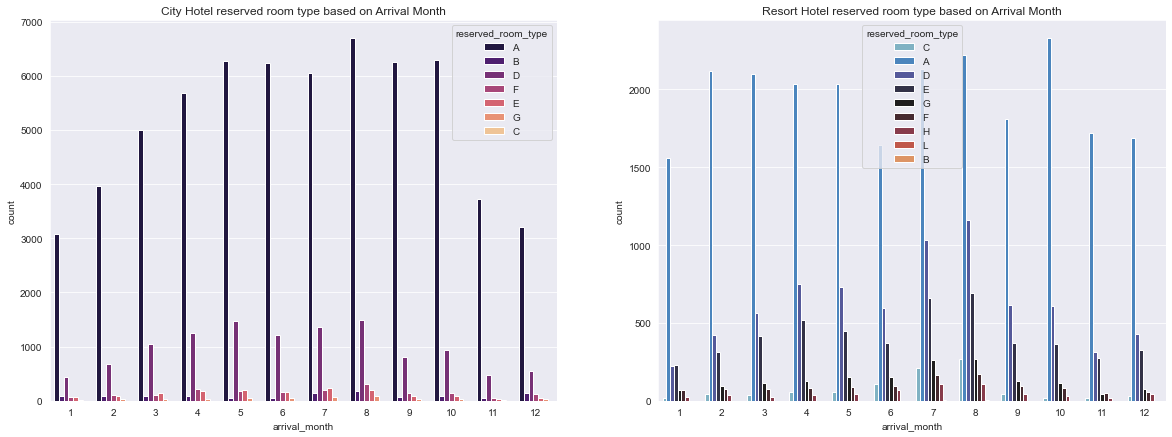

In [288]:
plt.figure(figsize = (20, 7))
plt.subplot(1,2,1)
sns.countplot(x = 'arrival_month', hue = 'reserved_room_type', data = df[df['hotel'] == 'City Hotel'], palette = 'magma')
plt.title('City Hotel reserved room type based on Arrival Month')
plt.subplot(1,2,2)
sns.countplot(x = 'arrival_month', hue = 'reserved_room_type', data = df[df['hotel'] == 'Resort Hotel'], palette = 'icefire')
plt.title('Resort Hotel reserved room type based on Arrival Month')
plt.show()

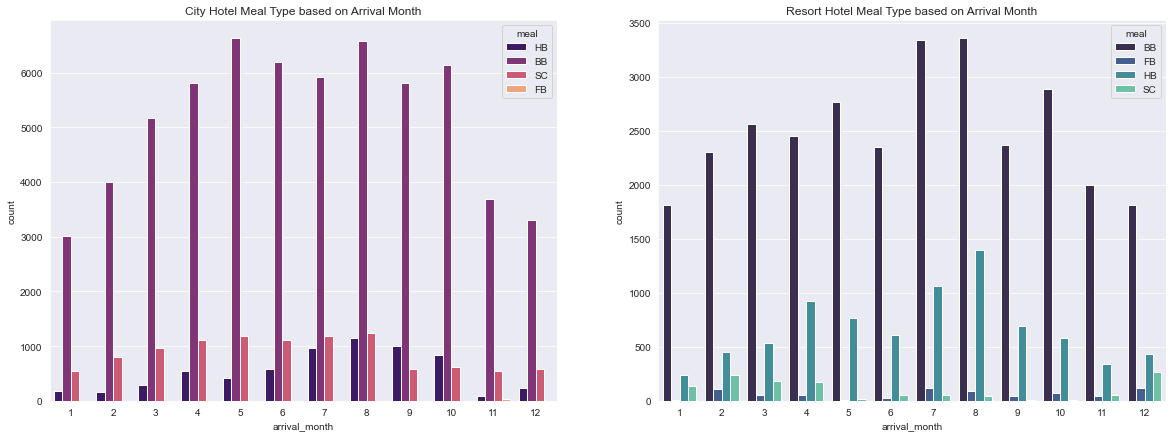

In [264]:
plt.figure(figsize = (20, 7))
plt.subplot(1,2,1)
sns.countplot(x = 'arrival_month', hue = 'meal', data = df[df['hotel'] == 'City Hotel'], palette = 'magma')
plt.title('City Hotel Meal Type based on Arrival Month')
plt.subplot(1,2,2)
sns.countplot(x = 'arrival_month', hue = 'meal', data = df[df['hotel'] == 'Resort Hotel'], palette = 'mako')
plt.title('Resort Hotel Meal Type based on Arrival Month')
plt.show()
# Bed and Breakfast seems to be the most popular meal package for both hotel with the highest demand on 
    # May for City Hotel and August For Resort Hotel
    
# No meal package or SC is second most popular package for city hotel for majority of the year
# For Resort Hotel Half Board Meal Package is the second most popular meal package

### Cancelled / non cancelled  Arrival month year analysis

### Hotel Types and Cancellation

Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r

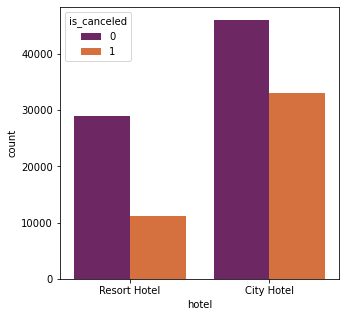

In [108]:
plt.figure(figsize = (5,5))
sns.countplot(x= 'hotel', hue = 'is_canceled', data = df, palette = 'inferno')

# This Shows that city hotel is more people preffered city hotel compared to resort hotel
# resort hotel has a lower cancellation rate compared to city hotel

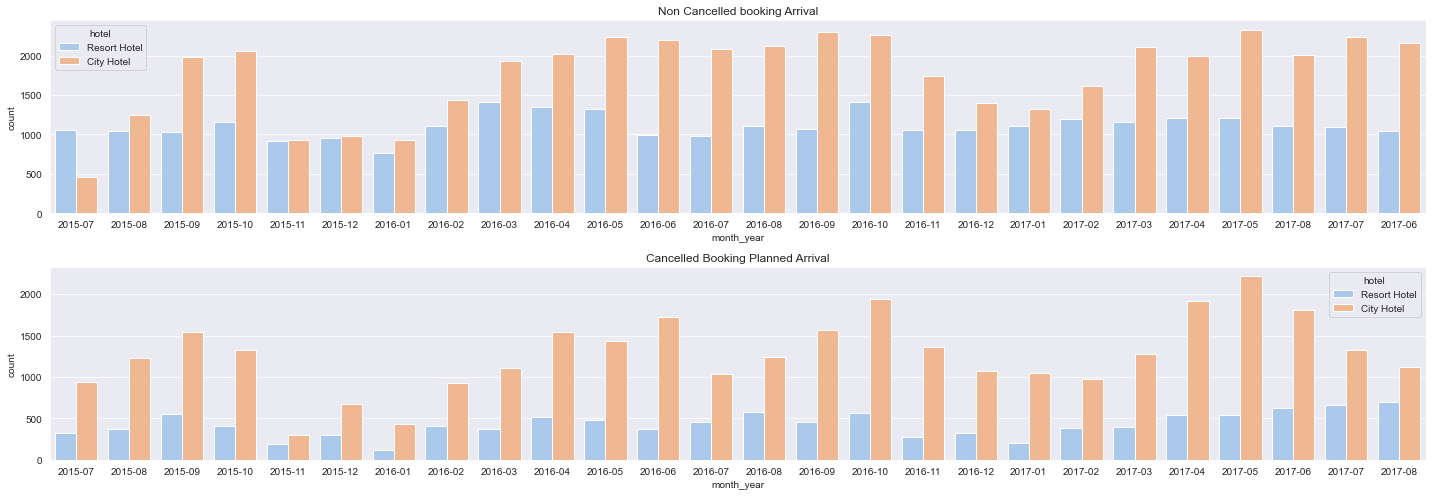

In [249]:
plt.figure(figsize = (20, 7))
plt.subplot(2,1,1)
sns.countplot(data = df_not_canceled, x = 'month_year', hue = 'hotel', palette = 'pastel')
plt.title('Non Cancelled booking Arrival')
plt.subplot(2,1,2)
sns.countplot(data = df_canceled, x = 'month_year', hue = 'hotel', palette = 'pastel')
plt.title('Cancelled Booking Planned Arrival')
plt.tight_layout()
plt.show()

# the highest cancellation rate for city hotel happened on may 2017
# while for resort hotel the highest cancellation rate happened on August 2017

# For no Cancelled Booking City hotel has the highest confirmed booking on september 2016 and may 2017
# For Resort Hotel highest confirmed arrival on march 2016 and october 2016

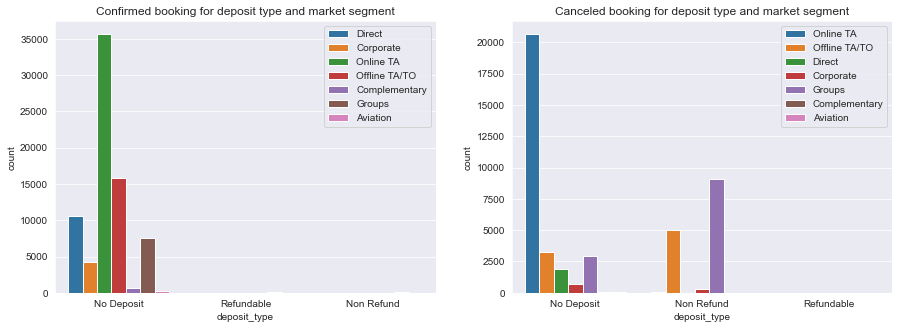

In [344]:
## Cancellation and deposit
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(data = df_not_canceled, x = 'deposit_type', hue = 'market_segment')
plt.title('Confirmed booking for deposit type and market segment')
plt.legend(loc = 1)
plt.subplot(1,2,2)
sns.countplot(data = df_canceled, x = 'deposit_type', hue = 'market_segment')
plt.title('Canceled booking for deposit type and market segment')
plt.legend(loc = 1)


# from this graph we could conclude no deposit policy might lead into a higher cancellation rate
# we are not gonna focus too much on the no refund policy since it wouldn't hurt hotel profit as bad as no deposit




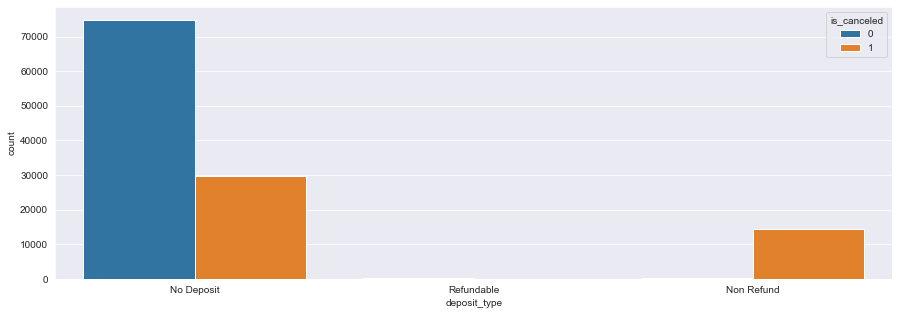

In [346]:
plt.figure(figsize = (15, 5))

sns.countplot(x = 'deposit_type', data = df, hue = 'is_canceled')

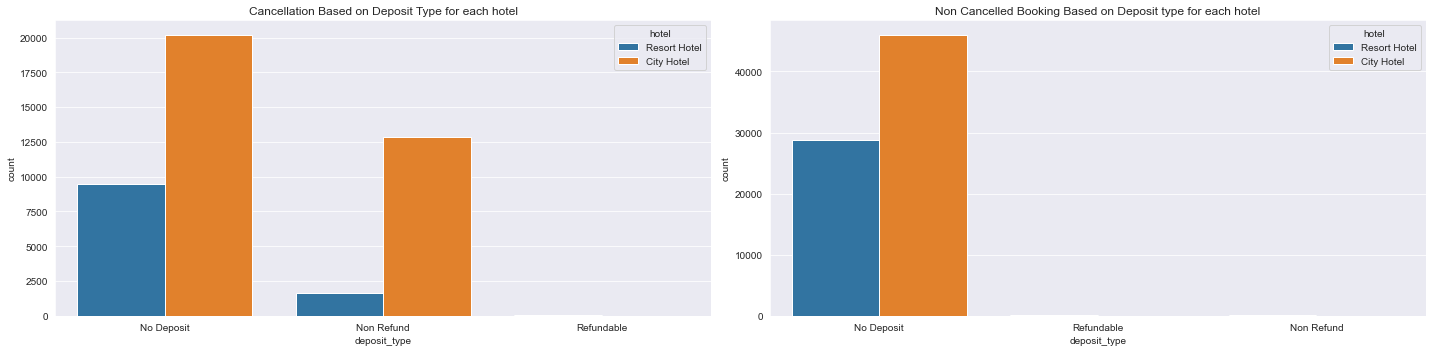

In [295]:
#cancellation and deposit type of each hotel
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.countplot(data = df_canceled, x = 'deposit_type', hue = 'hotel')
plt.title("Cancellation Based on Deposit Type for each hotel")
plt.subplot(1,2,2)
sns.countplot(data = df_not_canceled, x = 'deposit_type', hue = 'hotel')
plt.title("Non Cancelled Booking Based on Deposit type for each hotel")
plt.tight_layout()
plt.show()

# No Deposit policy has the highest amount of cancellation of rate of all deposit types policy in both hotel
# Non Refund policy comes second in the highest number of cancellation

#Majority of confirmed booking is on no deposit policy as well

# Suggestion:
    # Non Refund deposit policy should be pushout more since it wouldn't hurt hotel in term of reevenue when the traveler canceled


Text(0.5, 1.0, 'Market Segment of canceled and non canceled booking')

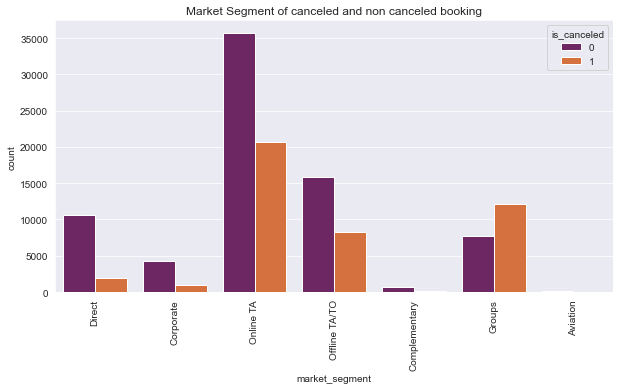

In [338]:
plt.figure(figsize =(10, 5))
schart = sns.countplot(x= 'market_segment', hue = 'is_canceled', data = df, palette = 'inferno')
schart.set_xticklabels(
    schart.get_xticklabels(), 
    rotation=90)
plt.title('Market Segment of canceled and non canceled booking')

# Group Booking is the only market segment that has a higher cancellation rate compared to it's non canceled booking the other market segment

# Online Travel Agent 

Text(0.5, 1.0, 'Market Segment of cancelled booking in both hotel')

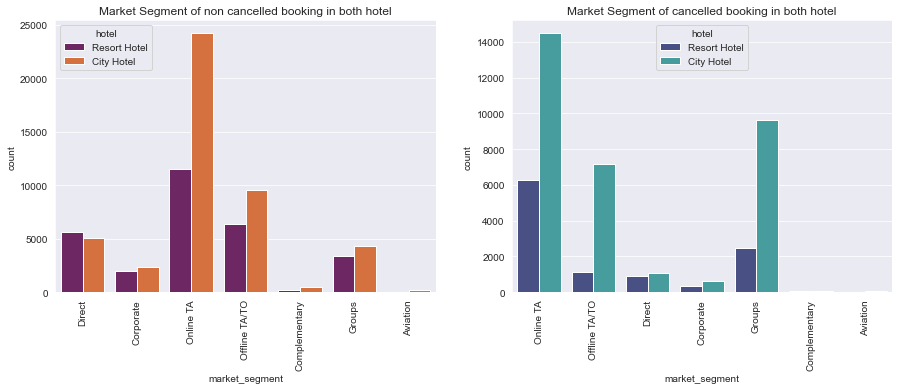

In [299]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
chart = sns.countplot(x= 'market_segment', hue = 'hotel', data = df_not_canceled, palette = 'inferno')
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90)
plt.title('Market Segment of non cancelled booking in both hotel')

plt.subplot(1,2,2)
chart1 = sns.countplot(x= 'market_segment', hue = 'hotel', data = df_canceled, palette = 'mako')
chart1.set_xticklabels(
    chart1.get_xticklabels(), 
    rotation=90)
plt.title('Market Segment of cancelled booking in both hotel')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119209 entries, 0 to 119389
Data columns (total 37 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119209 non-null  object        
 1   is_canceled                     119209 non-null  int64         
 2   lead_time                       119209 non-null  int64         
 3   arrival_date_year               119209 non-null  int64         
 4   arrival_date_month              119209 non-null  object        
 5   arrival_date_week_number        119209 non-null  int64         
 6   arrival_date_day_of_month       119209 non-null  int64         
 7   stays_in_weekend_nights         119209 non-null  int64         
 8   stays_in_week_nights            119209 non-null  int64         
 9   adults                          119209 non-null  int64         
 10  children                        119209 non-null  float64

## Looking at The Price Trends

Text(0.5, 1.0, 'Booking Arrival Month to Month Basis')

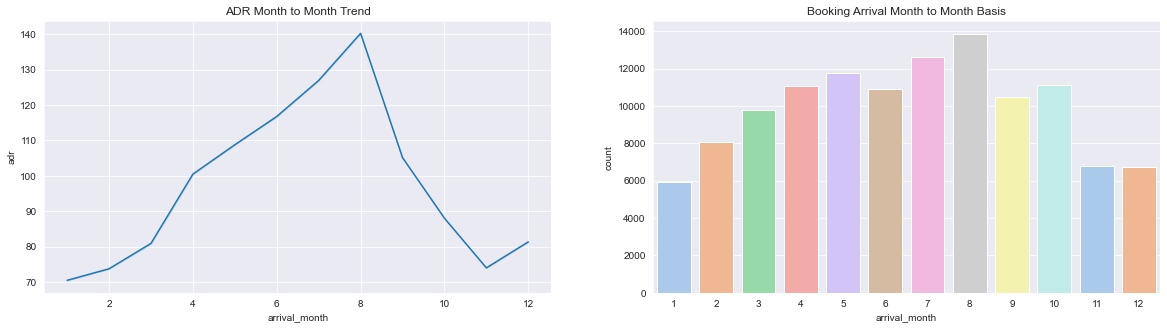

In [213]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.lineplot(x= 'arrival_month', y='adr', data = df, palette = 'Spectral', ci = 0)
plt.title('ADR Month to Month Trend')
plt.subplot(1,2,2)
sns.countplot(x = 'arrival_month', data = df, palette = 'pastel')
plt.title('Arrival Month to Month Basis')

# majority of market segment adr going up from january to august with few exception of aviation and groups
# From August to the end of the year majority adr trend are going down

# Number of Arrival seems to have a positive correlation with adr

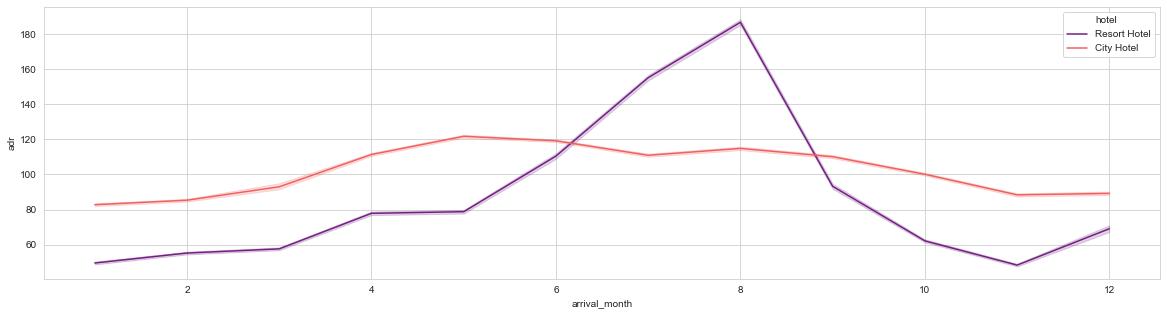

In [199]:
plt.figure(figsize = (20,5))
sns.set_style('whitegrid')
sns.lineplot(x= 'arrival_month', y='adr', hue = 'hotel', data = df, palette = 'magma')

## Resort hotel adr tend to be more fluctuative compared to city hotel, January seems to be the lowest adr for resort hotel

## for city hotel adr seems to be more stable it has it lowest adr on January

# for most of the year city hotel has a higher adr compared to resort hotel, with exception of july and august
# adr resort hotel showing positive trend from january to august after that the adr showing negative trend until november

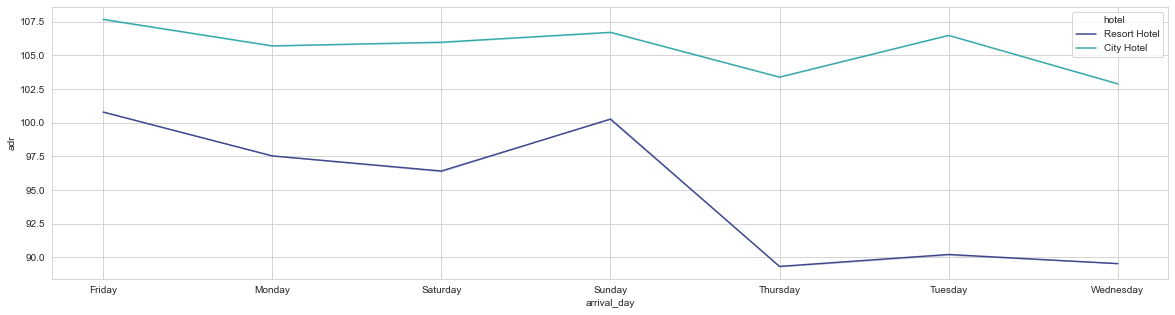

In [132]:
plt.figure(figsize = (20,5))
sns.set_style('whitegrid')
sns.lineplot(x= 'arrival_day', y='adr', hue = 'hotel', data = df, palette = 'mako', ci = 0)

# Booking on the arrival day of Friday seems to have the most expensive adr in both hotel
# While Arrival day on Wednesday seems to have the lowest adr on both hotel

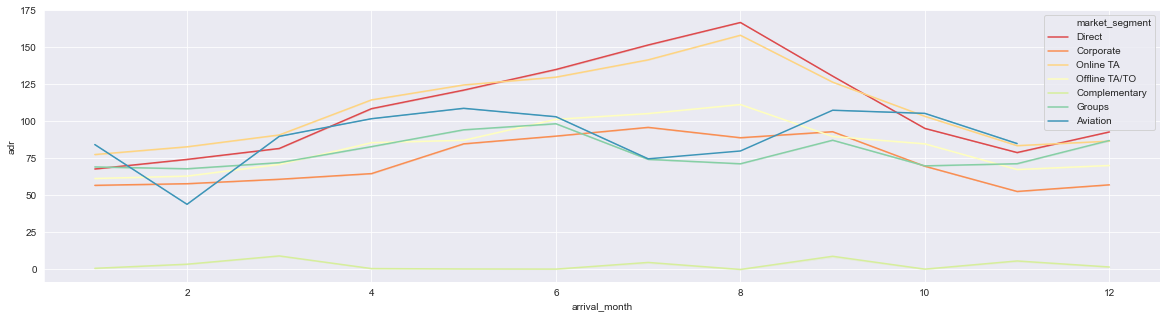

In [150]:
plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
sns.lineplot(x= 'arrival_month', y='adr', data = df, hue = 'market_segment', palette = 'Spectral', ci = 0)

# Corporate seems to have the lowest adr for majority of the first six month of the year
# majority of market segment adr going up from january to august with few exception of aviation and groups
# From August to the end of the year majority adr trend are going down

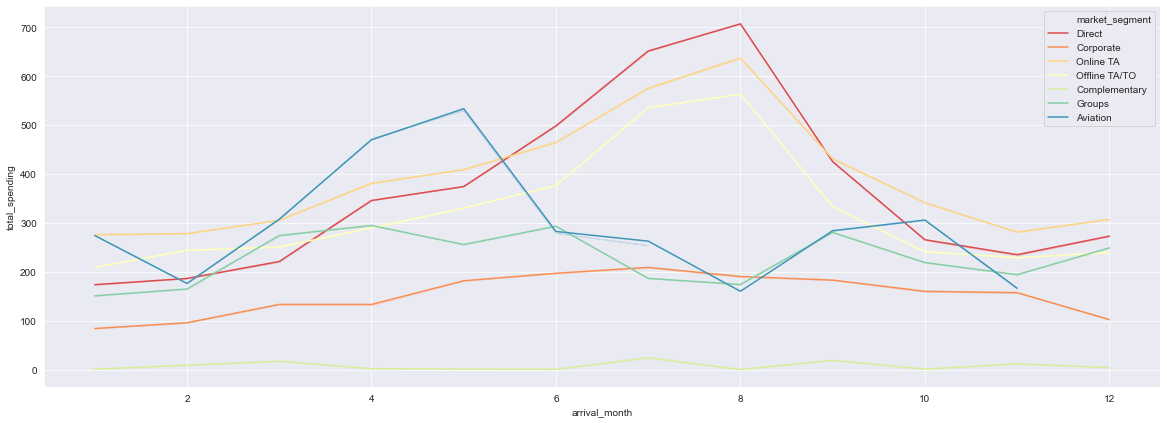

In [305]:
plt.figure(figsize = (20,7))
sns.set_style('darkgrid')
sns.lineplot(x = 'arrival_month', y = 'total_spending', hue = 'market_segment', data = df, palette = 'Spectral', ci = 0)

Text(0.5, 1.0, 'Previous Cancellation and effect to cancellation')

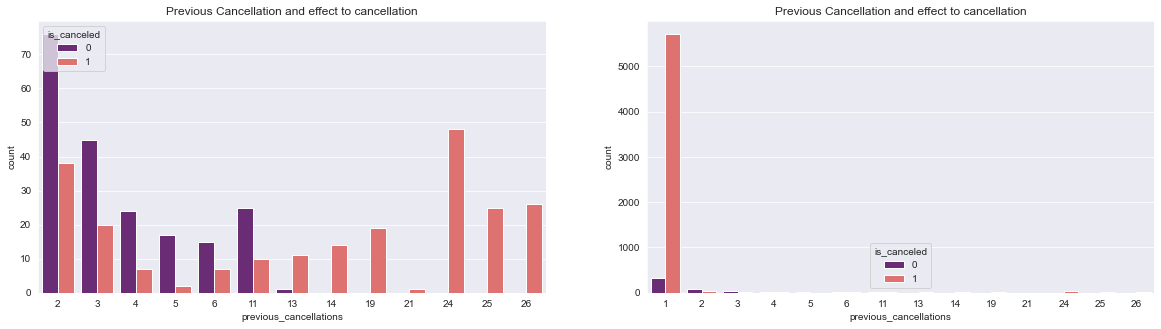

In [371]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.countplot(x = 'previous_cancellations', hue = 'is_canceled', data = df[df['previous_cancellations'] > 1], palette = 'magma')
plt.title('Previous Cancellation and effect to cancellation')
plt.subplot(1,2,2)
sns.countplot(x = 'previous_cancellations', hue = 'is_canceled', data = df[df['previous_cancellations'] > 0], palette = 'magma')
plt.title('Previous Cancellation and effect to cancellation')

In [372]:
pd.crosstab(index = df['previous_cancellations'], columns = df['is_canceled'], normalize = 'index')

is_canceled,0,1
previous_cancellations,,
0,0.660614,0.339386
1,0.055556,0.944444
2,0.666667,0.333333
3,0.692308,0.307692
4,0.774194,0.225806
5,0.894737,0.105263
6,0.681818,0.318182
11,0.714286,0.285714
13,0.083333,0.916667


KeyboardInterrupt: 

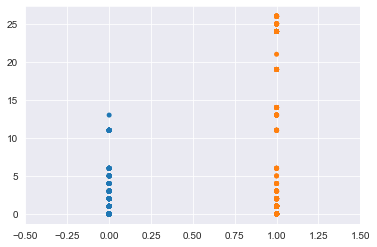

In [368]:
sns.swarmplot(x = 'is_canceled', y= 'previous_cancellations', data = df)